# Laboratorio 3 - Parte 2

### Arboles de decisión y Random Forest

### 2019-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer integrante: Santiago Alexis Sanchéz Zuleta
#### Segundo integrante: Raúl Andrés Gómez Ramírez

In [0]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
from __future__ import division


#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano, el cual fue abordado en el laboratorio anterior. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [0]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target
    

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un arbol de decisión. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<b>Note</b> que existe una clase para modelos de clasificación y otra para modelos de regresión:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [0]:
import math
import numpy as np
from numpy import random
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy.matlib

def simulacion(profundidad):
 
  #Validamos el modelo
  Folds = 4
  random.seed(19680801)
  EficienciaTrain = np.zeros(Folds)
  EficienciaVal = np.zeros(Folds)
  skf = StratifiedKFold(n_splits=Folds)
  j = 0
  for train, test in skf.split(X, Y):
      Xtrain = X[train,:]
      Ytrain = Y[train]
      Xtest = X[test,:]
      Ytest = Y[test]
      
      #Normalizamos los datos
      media = np.mean(Xtrain)
      desvia = np.std(Xtrain)
      Xtrain = sc.stats.stats.zscore(Xtrain)
      Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
      
      #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
      #print(profundidad)
      model = DecisionTreeClassifier(max_depth=int(profundidad))
      model.fit(Xtrain,Ytrain)
      
      
      
      #Validación
      Ytrain_pred = model.predict(Xtrain) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
      Yest =model.predict(Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
      
      #Evaluamos las predicciones del modelo con los datos de test
      EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
      EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
      j += 1
          
  print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
  print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
  return  str(np.mean(EficienciaVal)), str(np.std(EficienciaVal))


Responda:

1.1 ¿Cuáles criterios para detener el crecimiento del árbol o de los nodos están disponibles en la librería?:

R/ 
* Se tiene la profundidad, con la cual se puede definir el máximo nivel al que puede llegar el árbol.
*El minimo numero de muestras que limitamos a un nodo hoja.  
*El minimo numero de muestras necesarias para dividir un nodo interno.



1.2. ¿Cuáles son los parámetros asociados con los criterios enumerados en el punto anterior?:

R/ max_depth, min_samples_leaf, min_samples_split

## Ejercicio 2

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [0]:
#!pip install qgrid
import pandas as pd
import qgrid
import numpy as np
randn = np.random.randn
df_types = pd.DataFrame({
    'Maxima profundidad' : pd.Series([5,10,20,30,50])})
 
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Maxima profundidad'], inplace=True)
for d in df_types.index:
  #print("aca esta el depth"+ d)
  Validation_efficiency,confidence_interval=simulacion(d)
  df_types["Eficiencia en validacion"][d]=Validation_efficiency
  df_types["Intervalo de confianza"][d]=confidence_interval

#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

Eficiencia durante el entrenamiento = 0.9828703703703703+-0.004606423319938036
Eficiencia durante la validación = 0.9111111111111111+-0.04461771778946944
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013888888888889+-0.03224496323956637
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013888888888889+-0.03224496323956637
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013888888888889+-0.03224496323956637
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013888888888889+-0.03224496323956637


/usr/local/lib/python3.6/dist-packages/qgrid/grid.py:827: DeprecationWarning: QgridWidget._df_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _df_changed(self):


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [0]:
qgrid_widget.get_changed_df()

,Eficiencia en validacion,Intervalo de confianza
Maxima profundidad,,
5,0.9111111111111111,0.04461771778946944
10,0.9013888888888889,0.03224496323956637
20,0.9013888888888889,0.03224496323956637
30,0.9013888888888889,0.03224496323956637
50,0.9013888888888889,0.03224496323956637


Responda: 
    
2.1 ¿Tiene algún efecto la normalización o estándarización de las variables en el desempeño del modelo de árboles de decisión? Explique su respuesta.    

R/Sufre unos cambios en la eficiencia aumentando un poco en los casos que su profundidad es mayor a 5 pero a su vez aumenta su intervalo de confianza, no es tan notorio el cambio.

In [0]:
qgrid_widget.get_changed_df()

,Eficiencia en validacion,Intervalo de confianza
Maxima profundidad,,
5,0.9111111111111111,0.04461771778946944
10,0.9013888888888889,0.03224496323956637
20,0.9013888888888889,0.03224496323956637
30,0.9013888888888889,0.03224496323956637
50,0.9013888888888889,0.03224496323956637




## Algoritmo sin normalización







In [0]:
def simulacion2(profundidad):
 
  #Validamos el modelo
  Folds = 4
  random.seed(19680801)
  EficienciaTrain = np.zeros(Folds)
  EficienciaVal = np.zeros(Folds)
  skf = StratifiedKFold(n_splits=Folds)
  j = 0
  for train, test in skf.split(X, Y):
      Xtrain = X[train,:]
      Ytrain = Y[train]
      Xtest = X[test,:]
      Ytest = Y[test]
      
      #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
      #print(profundidad)
      model = DecisionTreeClassifier(max_depth=int(profundidad))
      model.fit(Xtrain,Ytrain)
      
      
      
      #Validación
      Ytrain_pred = model.predict(Xtrain) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
      Yest =model.predict(Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
      
      #Evaluamos las predicciones del modelo con los datos de test
      EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
      EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
      j += 1
          
  print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
  print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
  return  str(np.mean(EficienciaVal)), str(np.std(EficienciaVal))


In [0]:
randn = np.random.randn
df_types2 = pd.DataFrame({
    'Maxima profundidad' : pd.Series([5,10,20,30,50])})
 
df_types2["Eficiencia en validacion"] = ""
df_types2["Intervalo de confianza"] = ""
df_types2.set_index(['Maxima profundidad'], inplace=True)
for de in df_types2.index:
  #print("aca esta el depth"+ d)
  Validation_efficiency,confidence_interval=simulacion2(de)
  df_types2["Eficiencia en validacion"][de]=Validation_efficiency
  df_types2["Intervalo de confianza"][de]=confidence_interval

#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types2, show_toolbar=False)
qgrid_widget

Eficiencia durante el entrenamiento = 0.9828703703703703+-0.004606423319938036
Eficiencia durante la validación = 0.9097222222222222+-0.046043290150696574
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9041666666666667+-0.033188342070412574
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9041666666666667+-0.033188342070412574
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9041666666666667+-0.033188342070412574
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9041666666666667+-0.033188342070412574


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Ejercicio 3

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un Random Forest. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

<b>Note</b> que al igual que en el caso anterior, existe una clase para modelos de clasificación y otra para modelos de regresión: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [0]:
from sklearn.ensemble import RandomForestClassifier

def simulacionRF(n_trees,features):
  #Validamos el modelo
  Folds = 4
  random.seed(19680801)
  EficienciaTrain = np.zeros(Folds)
  EficienciaVal = np.zeros(Folds)
  skf = StratifiedKFold(n_splits=Folds)
  j = 0
  for train, test in skf.split(X, Y):
      Xtrain = X[train,:]
      Ytrain = Y[train]
      Xtest = X[test,:]
      Ytest = Y[test]
      
      #Normalizamos los datos
      media = np.mean(Xtrain)
      desvia = np.std(Xtrain)
      Xtrain = sc.stats.stats.zscore(Xtrain)
      Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
      
      #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
      model = RandomForestClassifier(n_estimators=n_trees,max_features=features)
      model.fit(Xtrain,Ytrain)
      
      #Validación
      Ytrain_pred = model.predict(Xtrain) #Use el modelo previamente entrenado para hacer predicciones con aas mismas muestras de entrenamiento
      Yest = model.predict(Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muesaras de test
      
      #Evaluamos las prediccionesadel modelo con los datos de test
      EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
      EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
      j += 1
          
  print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
  print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
  return str(np.mean(EficienciaVal)), str(np.std(EficienciaVal))


Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [0]:
!pip install qgrid
import pandas as pd
import qgrid
randn = np.random.randn
df_types3 = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]), 'Variables analizadas por nodo' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types3["Eficiencia en validacion"] = ""
df_types3["Intervalo de confianza"] = ""
df_types3.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)

for trees, features in df_types3.index:
  Validation_efficiency2,confidence_interval2=simulacionRF(trees,features)
#df_types.sort_index(inplace=True)
  df_types3["Eficiencia en validacion"][trees,features]= Validation_efficiency2
  df_types3["Intervalo de confianza"][trees,features] = confidence_interval2
#df_types3["Eficiencia en validacion"][0]=0.877
#df_types3["Intervalo de confianza"][0] = 0.0143
qgrid_widget = qgrid.show_grid(df_types3, show_toolbar=False)
qgrid_widget

Eficiencia durante el entrenamiento = 0.9935185185185185+-0.005928818738363755
Eficiencia durante la validación = 0.8847222222222222+-0.04127127210584342
Eficiencia durante el entrenamiento = 0.9953703703703705+-0.0027777777777777957
Eficiencia durante la validación = 0.8819444444444444+-0.020925721074054687
Eficiencia durante el entrenamiento = 0.9953703703703703+-0.004811252243246865
Eficiencia durante la validación = 0.936111111111111+-0.021336515966301685
Eficiencia durante el entrenamiento = 0.9981481481481481+-0.0013094570021972925
Eficiencia durante la validación = 0.9305555555555556+-0.016433554953054506
Eficiencia durante el entrenamiento = 0.9949074074074074+-0.003306216865066146
Eficiencia durante la validación = 0.9097222222222222+-0.0302701315523658
Eficiencia durante el entrenamiento = 0.9944444444444445+-0.0013094570021973317
Eficiencia durante la validación = 0.9152777777777777+-0.038162865733428
Eficiencia durante el entrenamiento = 0.999537037037037+-0.000801875373874

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [0]:
qgrid_widget.get_changed_df()

Eficiencia en validacion Intervalo de confianza
Numero de arboles Variables analizadas por nodo                                                
5                 5                                   0.8847222222222222    0.04127127210584342
                  10                                  0.8819444444444444   0.020925721074054687
                  15                                   0.936111111111111   0.021336515966301685
                  20                                  0.9305555555555556   0.016433554953054506
                  25                                  0.9097222222222222     0.0302701315523658
                  30                                  0.9152777777777777      0.038162865733428
10                5                                   0.9208333333333334   0.027881749860951037
                  10                                  0.9333333333333333   0.012422599874998825
                  15                                  0.9277777777777778   0.022906142364542567
                  20                                  0.9236111111111112     0.0240161339802647
                  25                                  0.9222222222222222   0.019641855032959676
                  30                                  0.9194444444444444   0.024374901076089237
20                5                                   0.9527777777777777   0.018633899812498227
                  10                                  0.9402777777777778   0.020174776453241602
                  15                                  0.9388888888888889    0.02777777777777776
                  20                                  0.9374999999999999   0.015896559919805008
                  25                                  0.9249999999999999   0.017786456215091236
                  30                                  0.9291666666666666   0.029232729416457225
50                5                                   0.9555555555555555   0.023895347964007302
                  10                                  0.9444444444444444    0.02078698548207747
                  15                                  0.9458333333333333   0.024650332429581732
                  20                                  0.9333333333333333    0.01756820922315767
                  25                                  0.9388888888888889   0.020786985482077452
                  30                                  0.9319444444444445   0.030270131552365766
100               5                                   0.9652777777777777    0.01265337997103375
                  10                                  0.9541666666666666   0.019788620623298593
                  15                                  0.9486111111111111   0.023032116599690282
                  20                                  0.9347222222222222    0.02092572107405467
                  25                                  0.9333333333333333     0.0232405562926132
                  30                                  0.9291666666666667    0.02200413821910398

Responda:
    
3.1 Realice una prueba adicional empleando el total de variables para la selección del mejor umbral en cada nodo ¿De acuerdo con los resultados es mejor usar un bagging de árboles o Random Forest? Explique su respuesta.    

R/ Si bien el Bagging es mas estable  por que usa todas las caracteristicas en nuestros resultados es bueno detallar que el Random Forest nos provee mejores resultados en algunas ocasiones,en si el Bagging es un Random Forest con todas las caracteristicas, pero en esta situacion apesar de la estabilidad del Bagging debido a los mejores resultados del Random Forest es mejor usarlo.

##Bagging

In [81]:
qgrid_widget.get_changed_df()

,,Eficiencia en validacion,Intervalo de confianza
Numero de arboles,Variables analizadas por nodo,,
5,39,0.9152777777777777,0.024650332429581766
10,39,0.9138888888888889,0.038188130791298645
20,39,0.9194444444444444,0.0377818625242651
50,39,0.9249999999999999,0.03524604872347088
100,39,0.9180555555555555,0.02975595178559522


In [0]:
 from sklearn.ensemble import BaggingClassifier

def simulacionBagging(n_trees,features):
  #Validamos el modelo
  Folds = 4
  random.seed(19680801)
  EficienciaTrain = np.zeros(Folds)
  EficienciaVal = np.zeros(Folds)
  skf = StratifiedKFold(n_splits=Folds)
  j = 0
  for train, test in skf.split(X, Y):
      Xtrain = X[train,:]
      Ytrain = Y[train]
      Xtest = X[test,:]
      Ytest = Y[test]
      
      #Normalizamos los datos
      media = np.mean(Xtrain)
      desvia = np.std(Xtrain)
      Xtrain = sc.stats.stats.zscore(Xtrain)
      Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
      
      #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
      model = BaggingClassifier(n_estimators=n_trees,max_features=features)
      model.fit(Xtrain,Ytrain)
      
      #Validación
      Ytrain_pred = model.predict(Xtrain) #Use el modelo previamente entrenado para hacer predicciones con aas mismas muestras de entrenamiento
      Yest = model.predict(Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muesaras de test
      
      #Evaluamos las prediccionesadel modelo con los datos de test
      EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
      EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
      j += 1
          
  #print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
  #print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
  return str(np.mean(EficienciaVal)), str(np.std(EficienciaVal))

In [76]:
X.shape

(720, 39)

In [79]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types4 = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,10,20,50,100]), 'Variables analizadas por nodo' : pd.Series([39,39,39,39,39])})
df_types4["Eficiencia en validacion"] = ""
df_types4["Intervalo de confianza"] = ""
df_types4.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)

for treesB,featuresB in df_types4.index:
  Validation_efficiencyB,confidence_intervalB=simulacionBagging(treesB,featuresB)
  df_types4["Eficiencia en validacion"][treesB,featuresB]= Validation_efficiencyB
  df_types4["Intervalo de confianza"][treesB,featuresB] = confidence_intervalB
qgrid_widget = qgrid.show_grid(df_types4, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Ejercicio 4

Utilice el paquete time (instrucción time.clock()) para medir el efecto del número de árboles y de la cantidad de variables a analizar por nodo, en el tiempo que tarda el entrenamiento del modelo Random Forest. Construya una gráfica de tiempo vs número de árboles, dejando constante el número de variables en 20, y una gráfica de tiempo vs número de variables dejando constante el número de árboles en 30.

## Grafica variables constantes

In [140]:
import time
import pandas as pd
import qgrid
randn = np.random.randn
df_types5 = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,10,20,50,100]), 'Variables analizadas por nodo' : pd.Series([20,20,20,20,20])})
df_types5["Eficiencia en validacion"] = ""
df_types5["Intervalo de confianza"] = ""
df_types5.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)
times=np.zeros(5)
k=0
for treesG, featuresG in df_types5.index:
  Validation_efficiencyG,confidence_intervalG,total_time=simulacionRFG(treesG,featuresG)
  times[k]=total_time
  k=k+1

qgrid_widget = qgrid.show_grid(df_types5, show_toolbar=False)
qgrid_widget


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [141]:
times

array([0.022103, 0.043685, 0.086141, 0.213793, 0.426768])

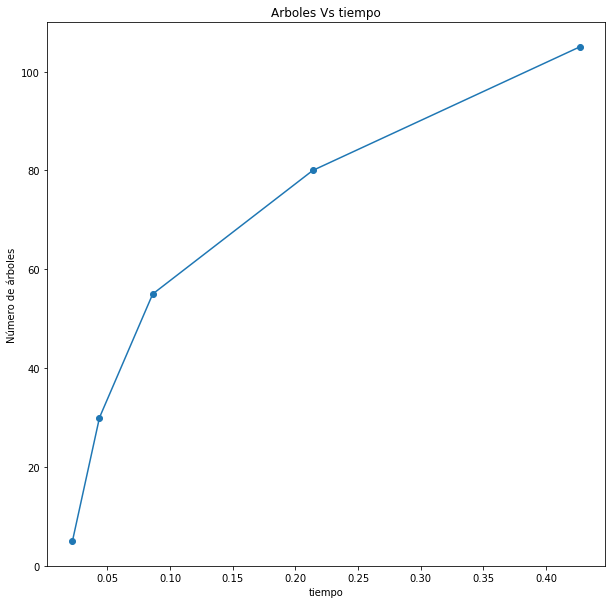

In [162]:
plt.figure(figsize=(10,10))
plt.plot(times, np.arange(5,125,25),'o-')

#plt.plot(times, np.arange(0,100,5))
plt.xlabel('tiempo')
plt.ylabel('Número de árboles')
plt.title('Arboles Vs tiempo')
plt.show()


## Variables Vs Arboles constantes

In [137]:
import time
import pandas as pd
import qgrid
randn = np.random.randn
df_types5 = pd.DataFrame({
    'Numero de arboles' : pd.Series([30,30,30,30,30,30]), 'Variables analizadas por nodo' : pd.Series([5,10,15,20,25,30])})
df_types5["Eficiencia en validacion"] = ""
df_types5["Intervalo de confianza"] = ""
df_types5.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)
times2=np.zeros(6)
r=0
for treesG, featuresG in df_types5.index:
  Validation_efficiencyG,confidence_intervalG,total_time=simulacionRFG(treesG,featuresG)
  #df_types4["Eficiencia en validacion"][treesB,featuresB]= Validation_efficiencyB
  #df_types4["Intervalo de confianza"][treesB,featuresB] = confidence_intervalB
  times2[r]=total_time
  r=r+1

qgrid_widget = qgrid.show_grid(df_types5, show_toolbar=False)
qgrid_widget


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [138]:
times2

array([0.072765, 0.094125, 0.11548 , 0.129597, 0.147755, 0.163023])

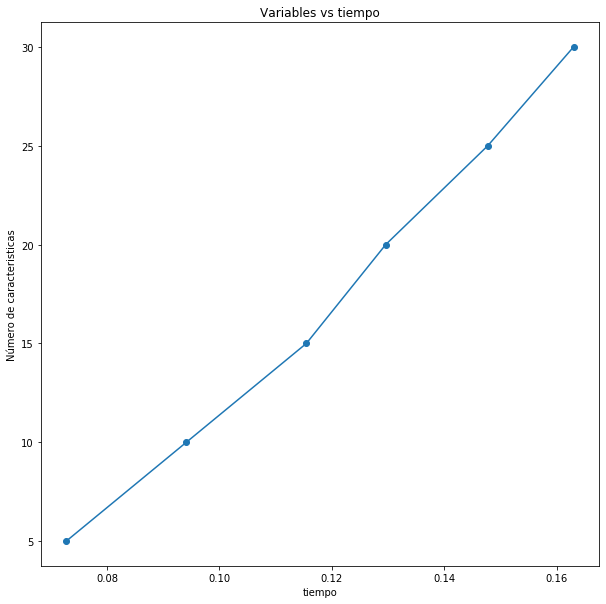

In [161]:
plt.figure(figsize=(10,10))
plt.plot(times2, np.arange(5,35,5),'o-')
plt.xlabel('tiempo')
plt.ylabel('Número de caracteristicas')
plt.title('Variables vs tiempo')
plt.show()

## Random Forest Time

In [0]:

from sklearn.ensemble import RandomForestClassifier
def simulacionRFG(n_trees,features):
  #Validamos el modelo
  Folds = 4
  random.seed(19680801)
  EficienciaTrain = np.zeros(Folds)
  EficienciaVal = np.zeros(Folds)
  skf = StratifiedKFold(n_splits=Folds)
  j = 0
  for train, test in skf.split(X, Y):
      Xtrain = X[train,:]
      Ytrain = Y[train]
      Xtest = X[test,:]
      Ytest = Y[test]
      
      #Normalizamos los datos
      media = np.mean(Xtrain)
      desvia = np.std(Xtrain)
      Xtrain = sc.stats.stats.zscore(Xtrain)
      Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
      
      #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
      model = RandomForestClassifier(n_estimators=n_trees,max_features=features)
      time1 = time.clock()
      model.fit(Xtrain,Ytrain)
      time2 = time.clock()
      total_time = time2 - time1
        
      
      #Validación
      Ytrain_pred = model.predict(Xtrain) #Use el modelo previamente entrenado para hacer predicciones con aas mismas muestras de entrenamiento
      Yest = model.predict(Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muesaras de test
      
      #Evaluamos las prediccionesadel modelo con los datos de test
      EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
      EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
      j += 1
          
 # print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
  #print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
  #print (total_time)
  return str(np.mean(EficienciaVal)), str(np.std(EficienciaVal)),total_time